## Applying Decision Tree

**About the dataset:**
- The Consumer's Buying Behaviour Dataset includes three columns: Age, Estimated Salary, and Purchased.

**I will use a decision tree algorithm to predict whether an individual will make a purchase based on their age and estimated salary.**

## Step1: Import th required librarys

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib .pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import export_text
%matplotlib inline 

## Step 2: Download the Dataset

In [2]:
df=pd.read_csv('/kaggle/input/consumers-buying-behavior/social_ads.csv')
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


## Step 3: Analyzing the Dataset

In [3]:
df.shape

(400, 3)

In [4]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.nunique()

Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [8]:
df['Age'].value_counts()

Age
35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: count, dtype: int64

## Step 5: Split tha Dataset into a training set and a test set 

In [9]:
X=df.drop('Purchased',axis=1)
y=df[['Purchased']]

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

## Step 6: Train the Decision Tree Model

In [11]:
model=DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=3,min_samples_leaf=5)

In [12]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

## Step 7: Predict the label for unseen test data

In [13]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0])

## Step 8: Calculate the model accuracy and Show The Confusion matrix and The Classification Report

In [14]:
accuracy=accuracy_score(y_test,y_pred)
print('The accuracy of the model is:',accuracy*100)

The accuracy of the model is: 90.0


In [15]:
cm=confusion_matrix(y_test,y_pred)
print('The Confusion Matrix:\n',cm)

The Confusion Matrix:
 [[71  6]
 [ 6 37]]


In [16]:
report=classification_report(y_test,y_pred)
print('The Classification Report:\n',report)

The Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92        77
           1       0.86      0.86      0.86        43

    accuracy                           0.90       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.90      0.90      0.90       120



## Step 9: Display the decision Tree

In [17]:
target=list(df['Purchased'].unique())
feature_names=list(X.columns)

In [18]:
r=export_text(model,feature_names=feature_names)
print(r)

|--- Age <= 42.50
|   |--- EstimatedSalary <= 89500.00
|   |   |--- Age <= 36.50
|   |   |   |--- class: 0
|   |   |--- Age >  36.50
|   |   |   |--- class: 0
|   |--- EstimatedSalary >  89500.00
|   |   |--- EstimatedSalary <= 117500.00
|   |   |   |--- class: 1
|   |   |--- EstimatedSalary >  117500.00
|   |   |   |--- class: 1
|--- Age >  42.50
|   |--- Age <= 46.50
|   |   |--- EstimatedSalary <= 85000.00
|   |   |   |--- class: 0
|   |   |--- EstimatedSalary >  85000.00
|   |   |   |--- class: 1
|   |--- Age >  46.50
|   |   |--- EstimatedSalary <= 41500.00
|   |   |   |--- class: 1
|   |   |--- EstimatedSalary >  41500.00
|   |   |   |--- class: 1



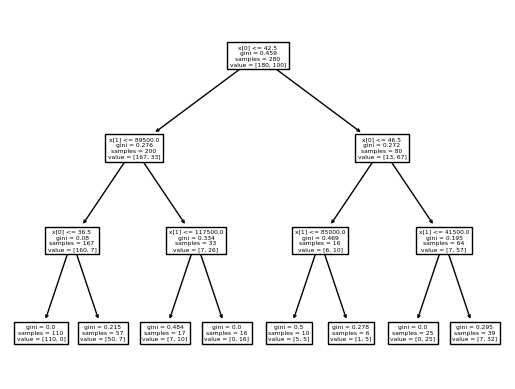

In [19]:
tree.plot_tree(model)
plt.show()